In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# The number of neurons
num_neurons = np.power(10, 2)

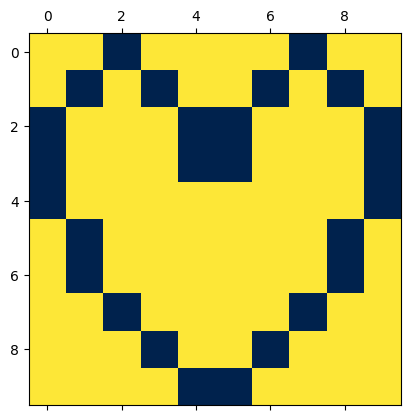

In [14]:
# Image shape
img_shape = (10, 10)
# Load image to be memorized
img_data = np.loadtxt('heart.csv', delimiter=',')
img_arr = img_data.flatten()
# Show the image
plt.matshow(img_data, cmap='cividis')

In [15]:
# Connect the neurons in a complete graph
# Training
W = np.matmul(img_arr[:, np.newaxis], img_arr[np.newaxis, :])
np.fill_diagonal(W, 0)
W = W / num_neurons

In [ ]:
# Add noise to the image
# TODO
#    Determine noise ratio
noise_ratio = 0.2
noise_idx = np.random.choice(range(len(img_arr)), np.floor(len(img_arr) * noise_ratio).astype(int), replace=False)
noise_arr = np.asarray([(-1 if img_arr[i] > 0 else 1) if i in noise_idx else 0 for i in range(len(img_arr))])
noisey_img_arr = np.asarray([(-1 if img_arr[i] > 0 else 1) if i in noise_idx else img_arr[i] for i in range(len(img_arr))])
# Show the noisy image
plt.matshow(noisey_img_arr.reshape(img_shape), cmap='cividis')

In [8]:
def inference(input_arr):
    rec_arr = input_arr
    # Iteratively recall the image
    for i in range(100):
        rec_arr = np.matmul(W, rec_arr)
        rec_arr = np.where(rec_arr >= 0, 1, rec_arr)
        rec_arr = np.where(rec_arr < 0, -1, rec_arr)
        if (rec_arr == img_arr).all():
            print('Recovered at the %s th step.' % (i+1))
            break
    # Recover the image
    rec_data = rec_arr.reshape(img_shape)
    return rec_data

Recovered at the 1 th step.


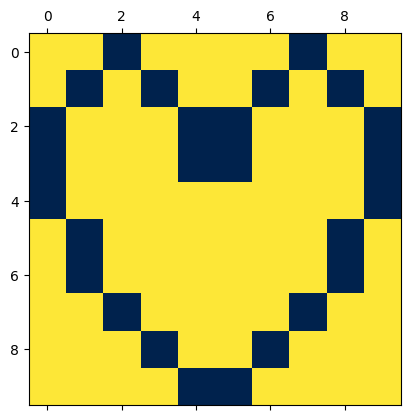

In [26]:
# Inference
rec_data = inference(noisey_img_arr)
# Show the recovered image
plt.matshow(rec_data, cmap='cividis')

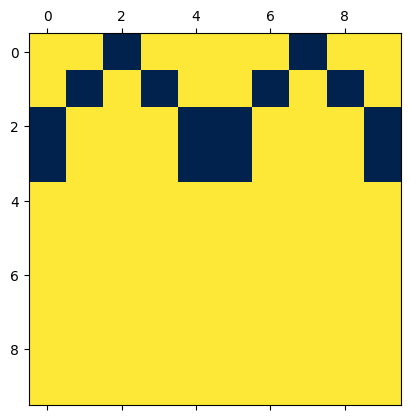

In [24]:
# Load incomplete image
incmp_img_data = np.loadtxt('half_heart.csv', delimiter=',')
incmp_img_arr = incmp_img_data.flatten()
# Show the image
plt.matshow(incmp_img_data, cmap='cividis')

Recovered at the 1 th step.


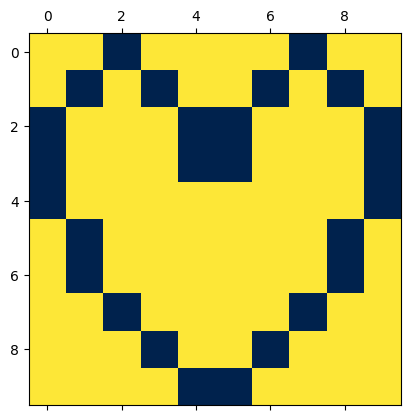

In [29]:
# Inference
rec_data = inference(incmp_img_arr)
# Show the recovered image
plt.matshow(rec_data, cmap='cividis')

(150, 200)


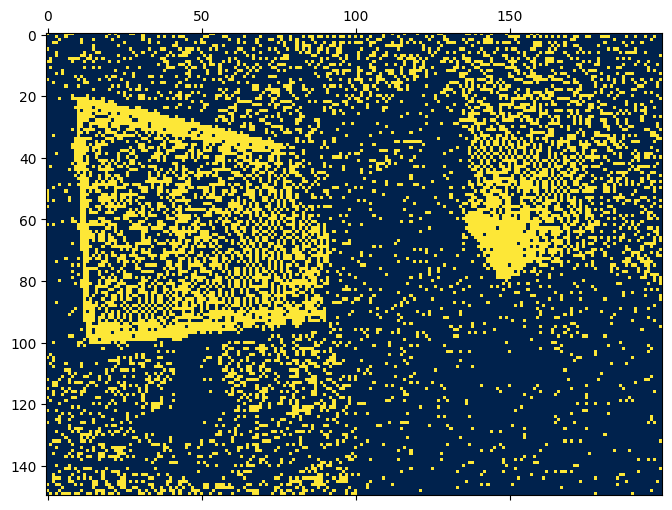

In [3]:
# Convert image to black-white
img_orig = Image.open("cool_cat.jpg") # open colour image
img_bw = img_orig.convert('1') # convert image to black and white
img_bw = img_bw.resize((200, 150))
img_bw_arr = np.asarray(img_bw)
img_bw_shape = img_bw_arr.shape
print(img_bw_shape)
img_bw_arr = np.where(img_bw_arr, 1, img_bw_arr)
img_bw_arr = np.where(img_bw_arr <= 0, -1, img_bw_arr)
fig, ax = plt.subplots(figsize=(8, 6))
ax.matshow(img_bw_arr, cmap='cividis')
img_bw_arr = img_bw_arr.flatten()

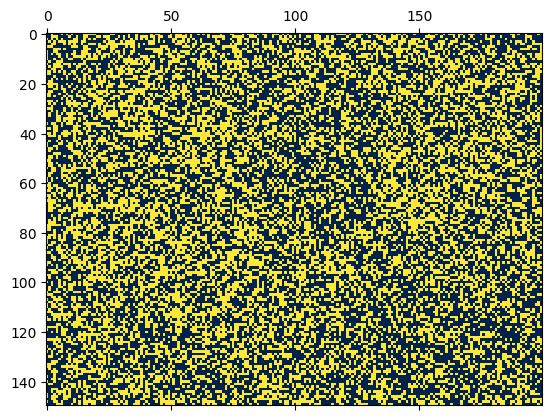

In [10]:
# Add noise to the image
# TODO
#    Determine noise ratio
img_arr = img_bw_arr
img_shape = img_bw_shape
noise_ratio = 0.4
noise_idx = np.random.choice(range(len(img_arr)), np.floor(len(img_arr) * noise_ratio).astype(int), replace=False)
noise_arr = np.asarray([(-1 if img_arr[i] > 0 else 1) if i in noise_idx else 0 for i in range(len(img_arr))])
noisey_img_arr = np.asarray([(-1 if img_arr[i] > 0 else 1) if i in noise_idx else img_arr[i] for i in range(len(img_arr))])
# Show the noisy image
plt.matshow(noisey_img_arr.reshape(img_shape), cmap='cividis')

In [11]:
# Number of neurons
num_neurons = img_shape[0] * img_shape[1]
# Connect the neurons in a complete graph
# Training
W = np.matmul(img_arr[:, np.newaxis], img_arr[np.newaxis, :])
np.fill_diagonal(W, 0)
W = W / num_neurons

Recovered at the 1 th step.


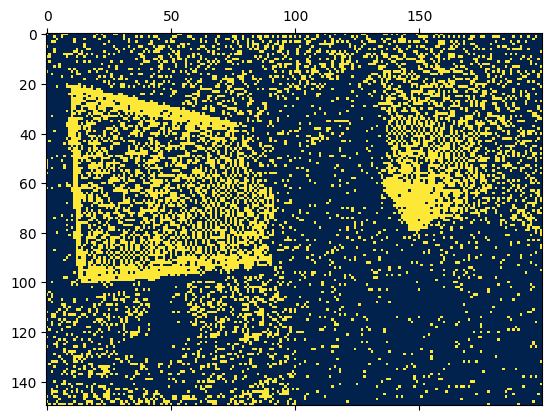

In [12]:
# Inference
rec_data = inference(noisey_img_arr)
# Show the recovered image
plt.matshow(rec_data, cmap='cividis')